In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
from sklearn.datasets import load_boston

In [32]:
boston = load_boston()

In [33]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [34]:
data = boston.data
feature_names = boston.feature_names
price = boston.target

In [35]:
X = pd.DataFrame(data,columns=feature_names)

In [36]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,price,test_size=0.2,random_state=42)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [42]:
scaler = StandardScaler()

In [43]:
X_train_scaled = scaler.fit_transform(X_train)

In [44]:
X_test_scaled = scaler.fit_transform(X_test)

In [45]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=feature_names)

In [46]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=feature_names)

In [48]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [50]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [51]:
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

In [52]:
X_train_tsne.shape

(404, 2)

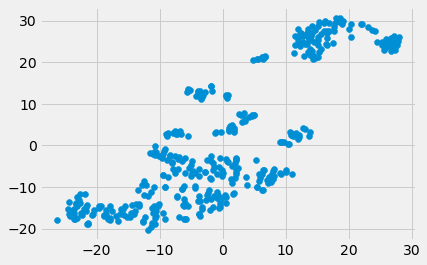

In [53]:
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1])

In [57]:
kmeans = KMeans(n_clusters=3,max_iter=100,random_state=42)

In [58]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [59]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Text(25, 15, 'Кластер 2')

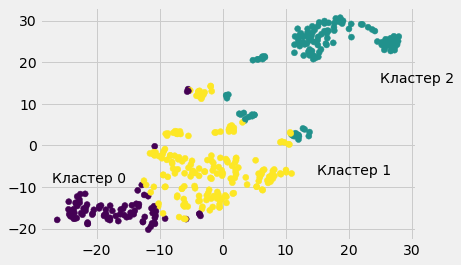

In [111]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.text(-27, -9, 'Кластер 0')
plt.text(15, -7, 'Кластер 1')
plt.text(25, 15, 'Кластер 2')

In [90]:
def getMeanX(train,param):
    return X_train.loc[labels_train==train, param].mean()

def getMeanY(train):
    return y_train[labels_train==train].mean()

In [82]:
getMeanX(0,'CRIM'),getMeanX(1,'CRIM'),getMeanX(2,'CRIM')

(0.07356558139534886, 10.797028425196853, 0.42166020942408367)

In [92]:
getMeanY(0),getMeanY(1),getMeanY(2)

(27.78837209302326, 16.165354330708663, 24.958115183246072)

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

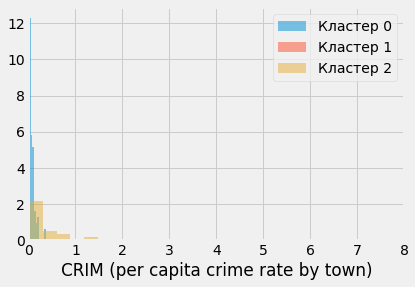

In [109]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins = 10, alpha=0.5, density = True)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins = 10, alpha=0.5, density = True)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins = 10, alpha=0.5, density = True)
plt.xlim(0, 8)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM (per capita crime rate by town)')

Text(0.5, 0, 'Цена')

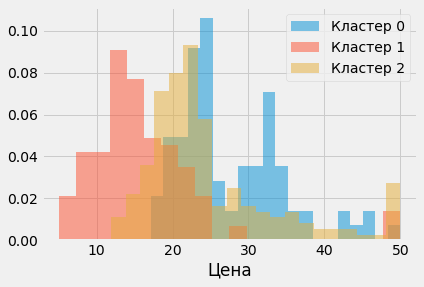

In [115]:
plt.hist(y_train[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

In [116]:
labels_train = kmeans.fit_predict(X_test_scaled)

In [118]:
def getMeanXTest(test,param):
    return X_test.loc[labels_train==test, param].mean()

def getMeanYTest(test):
    return y_test[labels_train==test].mean()

In [131]:
for i in range(len(pd.value_counts(labels_train))):
    print(getMeanXTest(i,'CRIM'))

0.08308461538461537
9.419181842105264
0.22250117647058823


In [130]:
for i in range(len(pd.value_counts(labels_train))):
    print(getMeanYTest(i))

34.55384615384616
16.710526315789473
21.71764705882353


Text(0.5, 0, 'Цена')

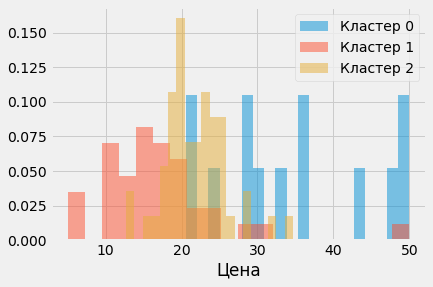

In [132]:
plt.hist(y_test[labels_train==0], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[labels_train==1], bins = 20, density = True, alpha=0.5)
plt.hist(y_test[labels_train==2], bins = 20, density = True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('Цена')

Text(0.5, 0, 'CRIM (per capita crime rate by town)')

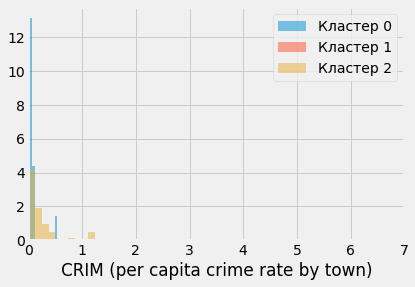

In [135]:
plt.hist(X_test.loc[labels_train==0, 'CRIM'], bins = 10, alpha=0.5, density = True)
plt.hist(X_test.loc[labels_train==1, 'CRIM'], bins = 10, alpha=0.5, density = True)
plt.hist(X_test.loc[labels_train==2, 'CRIM'], bins = 10, alpha=0.5, density = True)
plt.xlim(0, 7)
plt.legend(['Кластер 0', 'Кластер 1', 'Кластер 2'])
plt.xlabel('CRIM (per capita crime rate by town)')